In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Understanding

In [2]:
loan = pd.read_csv('loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.shape

(39717, 111)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Date Columns

In [6]:
date_cols = ['issue_d', 'last_pymnt_d', 'earliest_cr_line']

# Convert to Date type
for d in date_cols:
    loan[d] = pd.to_datetime(loan[d], format='%b-%y')
    
loan[date_cols].head()

,issue_d,last_pymnt_d,earliest_cr_line
0,2011-12-01,2015-01-01,1985-01-01
1,2011-12-01,2013-04-01,1999-04-01
2,2011-12-01,2014-06-01,2001-11-01
3,2011-12-01,2015-01-01,1996-02-01
4,2011-12-01,2016-05-01,1996-01-01


### Numerical Columns

In [7]:
num_cols = loan.select_dtypes(include=['number'])
num_cols.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    

In [8]:
num_cols.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Non-Numerical Columns

In [9]:
non_num_cols = loan.select_dtypes(include=['object'])
non_num_cols.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'revol_util', 'initial_list_status', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [10]:
non_num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   int_rate             39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   emp_title            37258 non-null  object
 5   emp_length           38642 non-null  object
 6   home_ownership       39717 non-null  object
 7   verification_status  39717 non-null  object
 8   loan_status          39717 non-null  object
 9   pymnt_plan           39717 non-null  object
 10  url                  39717 non-null  object
 11  desc                 26777 non-null  object
 12  purpose              39717 non-null  object
 13  title                39706 non-null  object
 14  zip_code             39717 non-null  object
 15  addr_state           39717 non-null  object
 16  revo

### Correcting data type of columns

In [11]:
loan['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
17.46%      1
24.59%      1
16.96%      1
16.01%      1
21.48%      1
Name: int_rate, Length: 371, dtype: int64

In [12]:
loan['revol_util'].value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
0.10%      58
         ... 
60.69%      1
1.88%       1
88.48%      1
69.98%      1
21.59%      1
Name: revol_util, Length: 1089, dtype: int64

In [13]:
# Correcting the datatypes of misinterpreted columns
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.strip('%')))
loan['revol_util'] = loan['revol_util'].apply(lambda x: float(str(x).strip('%')))

### Handling Missing Values

In [14]:
# compute null/non-null percentage for the entire dataframe
def compute_percentage(counts, flag):
    perc = 0
    if flag in counts.index:
        perc = round(100*(counts[flag]/loan.shape[0]), 2)
    return perc

# create a dictionary of columns that contain null vs. non-null percentage
cols_dict = {}
for col in list(loan.columns):
    counts = loan[col].isnull().value_counts()      #count null values
    false_perc = compute_percentage(counts, False)  #percentage of non-null values
    true_perc = compute_percentage(counts, True)    #percentage of null values
    
    if false_perc < 100:   #only adding columns to the dict which have null values
        cols_dict[col] = {'non_null_perc' : false_perc, 'null_perc' : true_perc}
        
# create a data frame of columns that have missing values along with null vs. non-null percentage
cols_loan = pd.DataFrame(cols_dict).T
cols_loan.head()

,non_null_perc,null_perc
emp_title,93.81,6.19
emp_length,97.29,2.71
desc,67.42,32.58
title,99.97,0.03
mths_since_last_delinq,35.34,64.66


### Columns with more than 90% od missing Values

In [15]:
# List of Columns which have > 90% missing values 
high_null_counts = cols_loan[cols_loan['null_perc'] > 90]
high_null_counts

,non_null_perc,null_perc
mths_since_last_record,7.01,92.99
next_pymnt_d,2.87,97.13
mths_since_last_major_derog,0.00,100.00
annual_inc_joint,0.00,100.00
dti_joint,0.00,100.00
verification_status_joint,0.00,100.00
tot_coll_amt,0.00,100.00
tot_cur_bal,0.00,100.00
open_acc_6m,0.00,100.00
open_il_6m,0.00,100.00


In [16]:
# Total number of columns that have > 90% missing values
high_null_counts.shape

(56, 2)

In [17]:
# Dropping the Columns that have > 90% missing values
loan.drop(axis = 1, columns=list(high_null_counts.index), inplace=True)
loan.shape

(39717, 55)

### Columns with 90% or less of missing values

In [18]:
# List of columns which have <=90% of missing values
low_null_counts = cols_loan[cols_loan['null_perc'] <= 90]
low_null_counts.shape

(12, 2)

In [19]:
loan.shape

(39717, 55)

In [20]:
# get a list of numerical columns that have <= 25% missing values
num_low_null_cols = list(loan[list(low_null_counts.index)].select_dtypes(include=["number"]).columns)
low_null_counts.loc[num_low_null_cols]

,non_null_perc,null_perc
mths_since_last_delinq,35.34,64.66
revol_util,99.87,0.13
collections_12_mths_ex_med,99.86,0.14
chargeoff_within_12_mths,99.86,0.14
pub_rec_bankruptcies,98.25,1.75
tax_liens,99.90,0.10


In [21]:
# Optionally filling the missing values with median
#for col in num_low_null_cols:
    #df[col].fillna(df[col].median(), inplace=True)   # fill in missing values with the median

#### Dropping the observations where loan status is 'Current'

In [22]:
loan = loan[~(loan['loan_status'] == 'Current')]
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

#### Encoding the target Variable

In [23]:
loan['loan_status_flag'] = loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

### Change object column type to category

In [24]:
excluded_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']

In [25]:
cat_cols = set(list(loan.select_dtypes(exclude=['number']).columns)) - set(excluded_cols)

In [26]:
cat_cols

{'addr_state',
 'application_type',
 'desc',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'last_credit_pull_d',
 'loan_status',
 'purpose',
 'pymnt_plan',
 'sub_grade',
 'term',
 'title',
 'url',
 'verification_status',
 'zip_code'}

In [27]:
# convert to categories
for col in cat_cols:
    if col == 'emp_length':
        ordered_cat = pd.api.types.CategoricalDtype(categories=['< 1 year', '1 year', '2 years', '3 years', 
                                                                '4 years', '5 years', '6 years', '7 years', 
                                                                '8 years', '9 years', '10+ years'], ordered=True)
    else:
        ordered_cat = pd.api.types.CategoricalDtype(categories=list(loan[col].value_counts().sort_index().index),
                                                   ordered=True)
    loan[col] = loan[col].astype(ordered_cat)

### Binning the Columns

In [28]:
# Binning the annual income column
inc_labels = ['<10k', '10k-50k', '50k-100k', '100k-500k', '>500k']
inc_bins = [0, 9999, 49999, 99999, 499999, 10000000]
loan['inc_range'] = pd.cut(loan['annual_inc'], bins = inc_bins, labels = inc_labels)

In [29]:
# Binning the interest rate column
int_labels = ['<5%', '5-10%', '10-15%', '15-20%', '20-25%']
int_bins = [0, 4.99, 9.99, 14.99, 19.99, 24.99]
loan['int_range'] = pd.cut(loan['int_rate'], bins=int_bins, labels=int_labels)

In [30]:
dti_labels = ['<5%', '5<10%', '10<15%', '15<20%', '20<25%', '25<30%']
dti_bins = [0, 4.99, 9.99, 14.99, 19.99, 24.99, 30]
loan['dti_range'] = pd.cut(loan['dti'], bins=dti_bins, labels=dti_labels)

## Data Analysis

A function to annotate graphs

In [31]:
def annotate(ax):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        
        # Number of points between bar and label. Change to your liking.
        space = 1
        
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar          
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)
    plt.show()

### Issued Loans

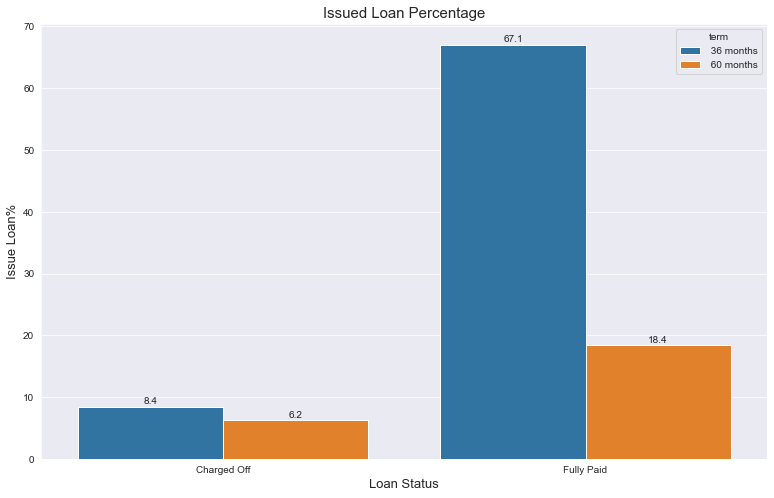

In [32]:
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = (13, 8)
ax = sns.barplot(x="loan_status", y="loan_status", hue='term', data=loan, 
                 estimator=lambda x: len(x) / len(loan) * 100, orient='v')
plt.xlabel('Loan Status', fontsize=13)
plt.ylabel('Issue Loan%', fontsize=13)
plt.title('Issued Loan Percentage', fontsize = 15)
annotate(ax)

### Frequency Distribution

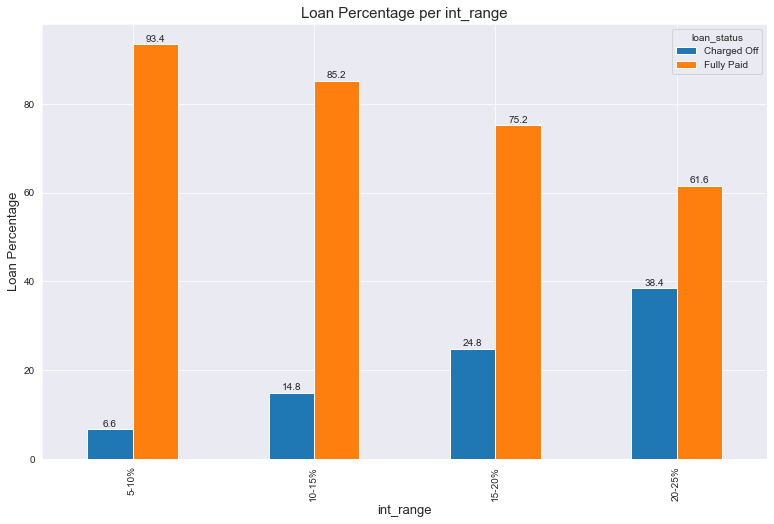

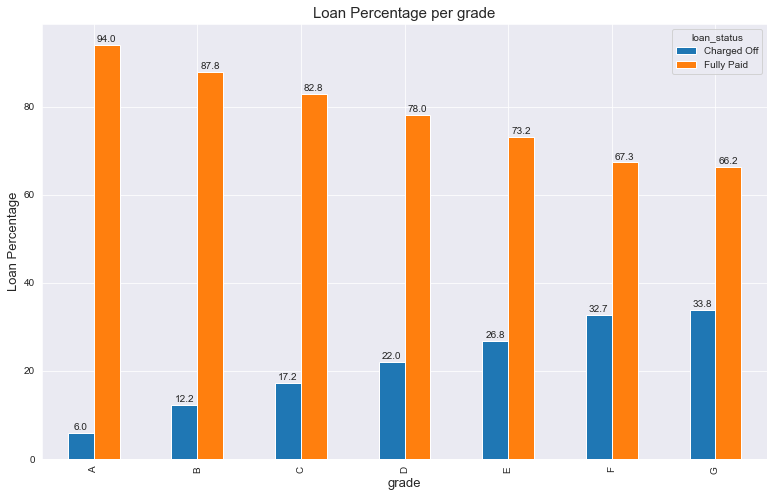

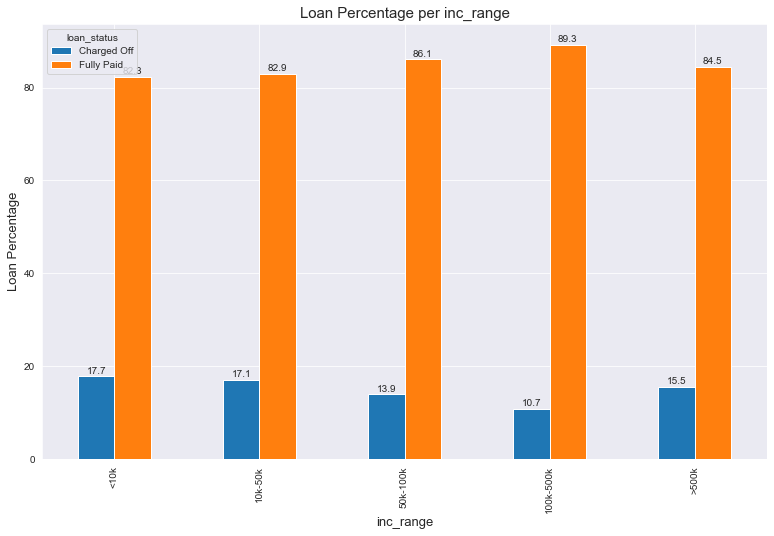

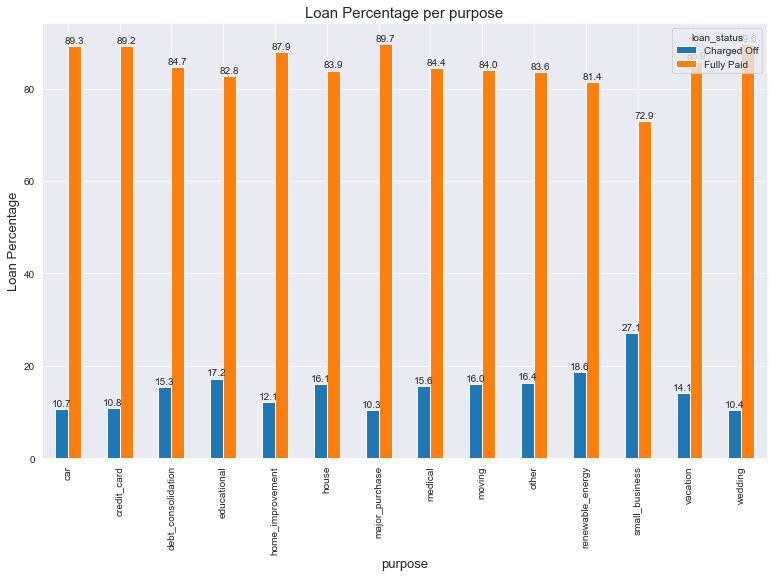

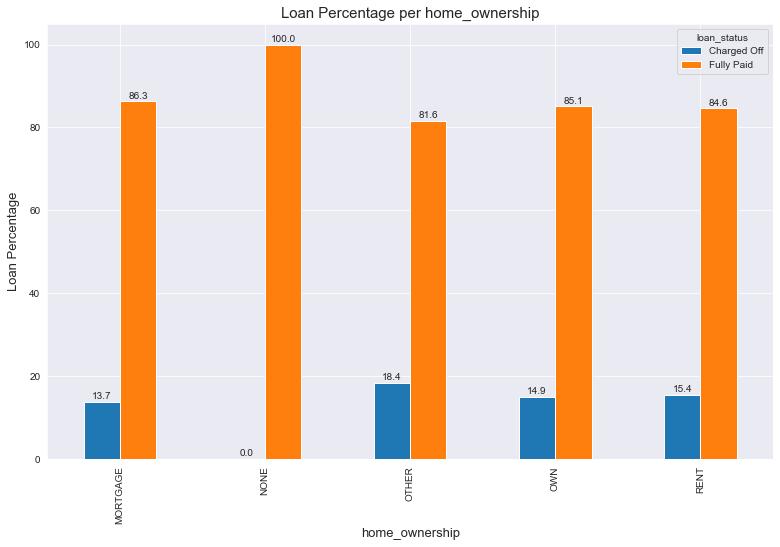

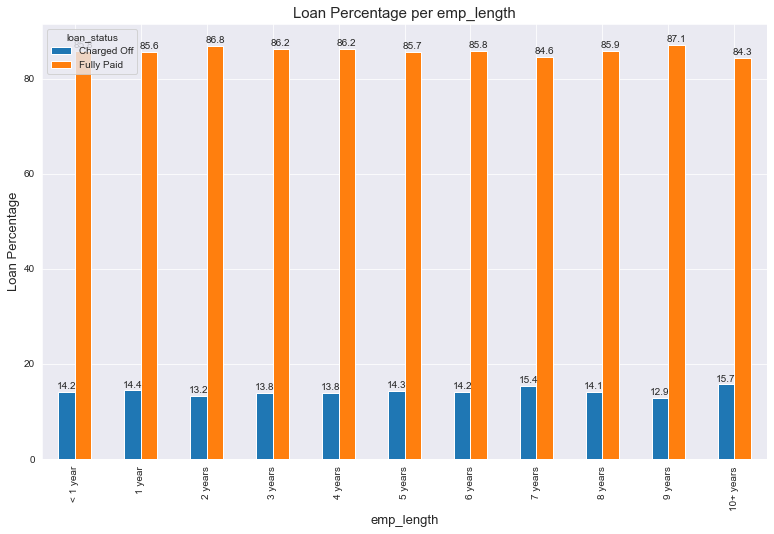

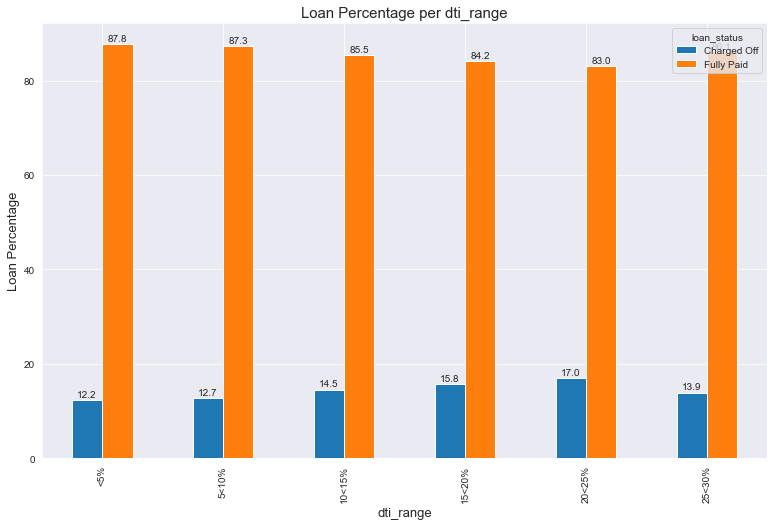

In [33]:
imp_cols = ['int_range', 'grade', 'inc_range', 'purpose', 'home_ownership', 'emp_length', 'dti_range']
for col in imp_cols:
    ax = pd.crosstab(loan[col], loan['loan_status']).apply(lambda x: 100*(x/x.sum()), axis=1).plot.bar()
    plt.title('Loan Percentage per ' + col, fontsize=15)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Loan Percentage', fontsize=13)
    annotate(ax)
    ax.legend(loc='best', frameon=False)

### Bivariate Analysis

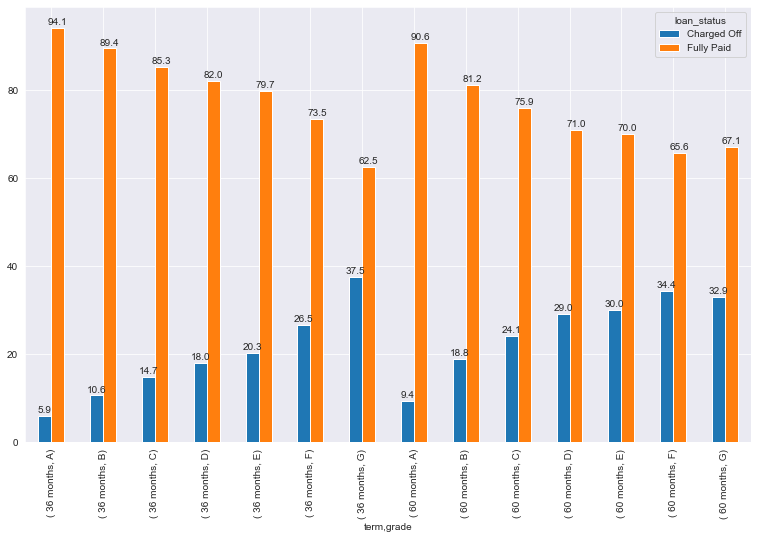

In [34]:
# Loan status vs Term and Grade
ax = loan.groupby(['term', 'grade', 'loan_status'])['id'].count().unstack().apply(lambda x: 100*(x/x.sum()), axis=1).plot.bar()
annotate(ax)